<div style="font-family: 'Times New Roman', Times, serif; font-size: 30px; font-weight: bold;">
  PROJECT PENGOLAHAN CITRA DIGITAL
</div>
Analisis Infeksi Malaria Berdasarkan Perbedaan Tekstur Citra Sek Darah Menggunakan Segmentasi Thresholding

================================= PERCOBAAN 2 ===================================

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Dalam proyek ini, kode di atas merupakan berbagai library yang diimpor untuk menunjang proses pengolahan citra, ekstraksi fitur, dan klasifikasi menggunakan machine learning. Library os digunakan untuk mengelola file dan folder, seperti membaca nama-nama file gambar yang akan diproses menggunakan fungsi seperti `os.listdir()` dan `os.path.join()`. Untuk pengolahan citra digital, digunakan `cv2` (diimpor sebagai `cv`) yang menyediakan fungsi-fungsi seperti `cv.imread()`, `cv.cvtColor()`, dan `cv.resize()` untuk membaca, mengubah warna, dan mengubah ukuran gambar. Visualisasi hasil seperti tampilan gambar atau grafik dilakukan menggunakan `matplotlib.pyplot` melalui fungsi `plt.imshow()`, `plt.title()`, dan `plt.show()`.

Library numpy (`np`) digunakan untuk operasi numerik seperti membuat array (`np.array()`), menghitung rata-rata (`np.mean()`), atau matriks korelasi. Fungsi `ceil()` dari math digunakan untuk membulatkan angka ke atas, sedangkan Counter dari collections digunakan untuk menghitung frekuensi label menggunakan `Counter()`.

Untuk pengelolaan data tabular, digunakan pandas (`pd`) yang memudahkan manipulasi data menggunakan struktur DataFrame, dengan fungsi seperti `pd.DataFrame()` dan `df.to_csv()`. Normalisasi fitur dilakukan dengan StandardScaler dari `sklearn`.preprocessing menggunakan fungsi `fit_transform()`, yang penting agar setiap fitur memiliki skala yang seragam. Untuk mengurangi dimensi data dan menghindari redundansi, digunakan PCA dari sklearn.decomposition dengan fungsi seperti `PCA()`.`fit_transform()`. Dataset kemudian dibagi menggunakan `train_test_split()` dari `sklearn.model_selection` menjadi data latih dan data uji.

Evaluasi performa model dilakukan menggunakan beberapa metrik dari `sklearn.metrics`, seperti `accuracy_score()`, `classification_report()`, `confusion_matrix()`, dan visualisasi dengan `ConfusionMatrixDisplay`. `from_predictions()`. Untuk ekstraksi fitur tekstur, digunakan metode GLCM (Gray-Level Co-occurrence Matrix) dari skimage.feature melalui fungsi `graycomatrix()` untuk membuat matriks ko-occurrence dan `graycoprops()` untuk menghitung properti tekstur seperti contrast, homogeneity, dan ASM. Selain itu, nilai entropi dihitung dari histogram citra menggunakan fungsi `entropy()` dari scipy.stats.

Terakhir, klasifikasi dilakukan menggunakan beberapa algoritma dari scikit-learn, yaitu RandomForestClassifier dari sklearn.ensemble dengan fungsi seperti `fit()` dan `predict()`, SVC (Support Vector Classifier) dari `sklearn.svm`, serta `KNeighborsClassifier` dari sklearn.neighbors. Ketiga model ini dilatih menggunakan data hasil ekstraksi fitur dan diuji untuk melihat akurasinya dalam membedakan kelas citra.

# DATA LOADING

In [2]:
data = []
labels = []
file_name = []
for label_folder in ['Parasitized', 'Uninfected']:
    folder_path = os.path.join('dataset\\', label_folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv.imread(img_path)
        img = cv.resize(img, (100, 100))  # Resize ke ukuran tetap
        data.append(img)
        labels.append(label_folder)
        file_name.append(filename) 

Kode di atas digunakan untuk membaca dan memproses gambar dari dua folder berbeda, yaitu `'Parasitized'` dan `'Uninfected'`, yang masing-masing merepresentasikan label dalam klasifikasi citra (misalnya gambar sel darah yang terinfeksi malaria dan yang sehat). Pertama, dua list yaitu `data` dan `labels` disiapkan untuk menyimpan citra dan labelnya, serta `file_name` untuk menyimpan nama file gambar. Dengan menggunakan perulangan `for`, kode menelusuri setiap folder label menggunakan `os.path.join()` untuk membentuk path lengkap ke folder, lalu mengambil semua nama file gambar dalam folder tersebut menggunakan `os.listdir()`. Setiap gambar kemudian dibaca menggunakan `cv.imread()` dan diubah ukurannya menjadi `100x100` piksel menggunakan `cv.resize()` agar memiliki ukuran seragam. Gambar hasil resize disimpan dalam list `data`, label (berdasarkan nama folder) disimpan dalam `labels`, dan nama file disimpan dalam `file_name`. Proses ini membentuk dataset yang siap digunakan.


Kode ini digunakan untuk menampilkan distribusi jumlah gambar berdasarkan kelas serta menampilkan contoh gambar dari masing-masing kelas dalam dataset. Pertama, `Counter(labels)` digunakan untuk menghitung jumlah gambar untuk setiap label (kelas), kemudian nama kelas `(classes)` dan jumlahnya `(counts)` diekstrak. Data ini divisualisasikan menggunakan `plt.bar()` dalam bentuk diagram batang, dengan judul, label sumbu, dan garis bantu (grid) pada sumbu-y untuk memperjelas tampilan. Setelah itu, program mencetak label "Output: Contoh Sample Data:" dan menampilkan satu contoh gambar dari setiap kelas. Ini dilakukan dengan menelusuri seluruh data, mengecek label, dan hanya menampilkan satu gambar per kelas menggunakan `plt.subplot()` dan `plt.imshow()` untuk menampilkan gambar. Gambar ditampilkan dalam satu baris menggunakan `plt.figure(figsize=(15, 3))`, dan loop dihentikan setelah semua kelas ditampilkan. Fungsi `plt.tight_layout()` digunakan untuk merapikan tata letak agar subplot tidak saling tumpang tindih.

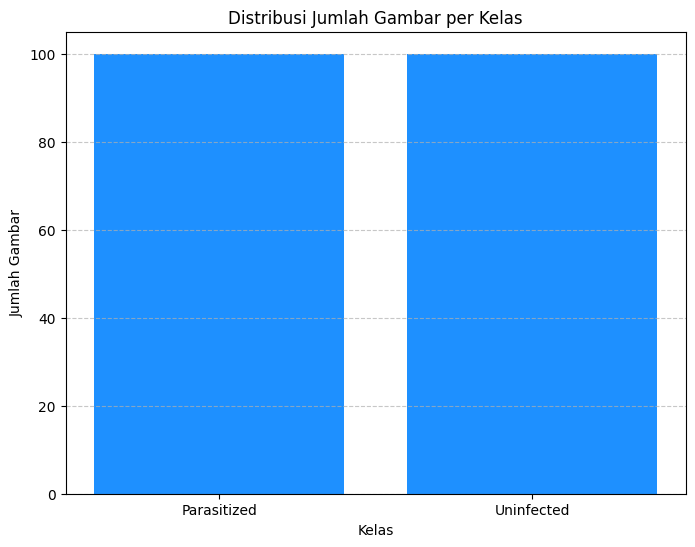

Output: Contoh Sample Data:


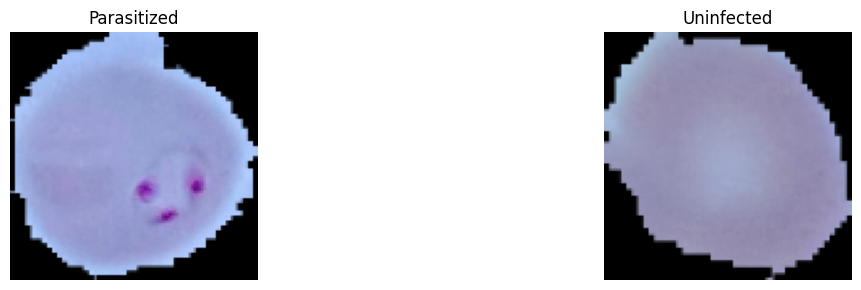

In [3]:
label_counts = Counter(labels)
classes = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='dodgerblue')
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Output: Contoh Sample Data:")

plt.figure(figsize=(15, 3))
shown_labels = set()
shown = 0

for i in range(len(data)):
    label = labels[i]
    if label in shown_labels:
        continue
    plt.subplot(1, len(classes), shown + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')
    shown_labels.add(label)
    shown += 1
    if shown >= len(classes):
        break

plt.tight_layout()
plt.show()

# PREPROCESSING

## Support

In [4]:
def sorting(arr): #di sort ini harus jd 1 array
    for i in range(len(arr)): 
        swap = i + np.argmin(arr[i:])
        (arr[i], arr[swap]) = (arr[swap], arr[i])
    return arr
def flatArray(arr): #buat jadiin array 1 dimensi
    row, col = arr.shape 
    flat=[]
    for i in range (row):
        for j in range (col):
            flat.append(arr[i][j]) #buat nambahin nilai ke list
    return flat

Kode ini digunakan untuk mengubah array dua dimensi menjadi satu dimensi dan kemudian mengurutkannya. Pertama, fungsi flatArray(arr) digunakan untuk membuat array satu dimensi dari array dua dimensi. Proses ini dilakukan dengan mengambil ukuran baris dan kolom menggunakan arr.shape, lalu menelusuri setiap elemen melalui dua loop bersarang dan menambahkan nilainya ke list flat menggunakan append(). Setelah diperoleh array satu dimensi, fungsi sorting(arr) akan mengurutkan elemen-elemen dalam array tersebut. Proses pengurutan dilakukan dengan algoritma selection sort, di mana pada setiap iterasi dicari nilai minimum dari sisa elemen menggunakan np.argmin(arr[i:]), kemudian dilakukan pertukaran posisi (swap) antara elemen saat ini dan elemen minimum tersebut. Hasil akhirnya adalah array satu dimensi yang telah terurut secara ascending. Kedua fungsi ini dapat digunakan bersama-sama untuk menyiapkan dan mengurutkan data dari array dua dimensi sebelum digunakan dalam analisis atau visualisasi lebih lanjut.

## Preprocessing

In [5]:
def prepro1_resize(img, new_width=100, new_height=100):
    old_height, old_width = img.shape[:2]
    resized = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = int(i * old_height / new_height)
            y = int(j * old_width / new_width)
            resized[i, j] = img[x, y]
    return resized
def prepro2_grayscale(img):
    height, width = img.shape[:2]
    gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i, j]
            gray[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)  # Luminosity formula
    return gray
def prepro3_normalization(img):
    height, width = img.shape
    norm = np.zeros((height, width), dtype=np.float32)

    for i in range(height):
        for j in range(width):
            norm[i, j] = img[i, j] / 255.0
    return norm
def prepro4_thresholding(image, threshold):
    res = np.zeros_like(image, dtype=np.uint8)
    res[image > threshold] = 255
    return res
def prepro5_median(image,windowHeight,windowWidth):
    pad = np.pad(image,(windowHeight,windowWidth),mode='edge')
    median = np.zeros(image.shape, dtype=np.uint8)
    for i in range(windowHeight,len(pad)-windowHeight):
        for j in range(windowWidth,len(pad)-windowWidth):
            window = flatArray(pad[i-windowHeight:i,j-windowWidth:j])
            window = sorting(window)
            median[i-windowHeight,j-windowWidth] = window[ceil(len(window)/2)]
    return median

Kode ini digunakan untuk melakukan serangkaian tahapan preprocessing pada citra sebelum digunakan dalam proses analisis atau pemrosesan lebih lanjut. Tahapan pertama dilakukan oleh fungsi prepro1_resize(img, new_width=100, new_height=100) yang berfungsi untuk mengubah ukuran gambar menjadi dimensi baru (default 100x100 piksel). Proses ini dilakukan secara manual dengan menghitung rasio posisi piksel dari gambar lama ke gambar baru, dan mengisi array resized menggunakan indeks yang disesuaikan. Selanjutnya, fungsi prepro2_grayscale(img) mengubah gambar berwarna menjadi gambar grayscale menggunakan rumus luminositas, yaitu 0.2989 * R + 0.5870 * G + 0.1140 * B, untuk mempertahankan persepsi kecerahan manusia.

Kemudian, fungsi prepro3_normalization(img) melakukan normalisasi dengan mengubah skala nilai piksel dari rentang 0–255 menjadi 0–1 dengan cara membagi setiap nilai piksel dengan 255.0. Setelah itu, fungsi prepro4_thresholding(image, threshold) menerapkan thresholding, yaitu mengubah piksel yang nilainya lebih besar dari ambang (threshold) menjadi 255 (putih), sedangkan sisanya tetap 0 (hitam), sehingga menghasilkan citra biner. Terakhir, fungsi prepro5_median(image, windowHeight, windowWidth) melakukan penyaringan median (median filtering) untuk mereduksi noise. Fungsi ini menambahkan padding pada citra dan menggunakan jendela berukuran tertentu untuk mengambil nilai tengah dari piksel-piksel dalam jendela tersebut. Proses pengambilan nilai tengah dilakukan dengan terlebih dahulu mengubah jendela menjadi array satu dimensi menggunakan flatArray(), kemudian mengurutkannya dengan sorting(). Nilai median dari jendela kemudian disisipkan ke posisi piksel yang sesuai pada gambar hasil. Dengan demikian, seluruh rangkaian fungsi ini dapat digunakan untuk membersihkan dan mempersiapkan gambar agar siap digunakan dalam tahap pengenalan pola, klasifikasi, atau pelatihan model.

In [7]:
output_folder = 'preprocessed_output2'
os.makedirs(output_folder, exist_ok=True)
dataPreprocessed = []

for i in range(len(data)):
    img = data[i]

    # === Tahapan Preprocessing Manual ===
    img_resized = prepro1_resize(img)            # Resize manual ke 100x100
    img_grayscale = prepro2_grayscale(img_resized)  # Konversi manual ke grayscale
    img_thresholded = prepro4_thresholding(img_grayscale, 118)  # Thresholding manual
    img_normalized = prepro3_normalization(img_thresholded)  # Normalisasi manual
    img_median = prepro5_median(img_normalized, 3, 3)
    img_normalized = prepro3_normalization(img_median)  # Normalisasi manual
    img_uint8 = (img_normalized * 255).astype(np.uint8) # ubah tipe data ke int untuk ekstraksi fitur
    dataPreprocessed.append(img_uint8)


Kode ini digunakan untuk melakukan proses preprocessing secara manual pada setiap gambar dalam dataset, kemudian menyimpannya ke dalam folder output. Pertama, folder tujuan bernama 'preprocessed_output2' dibuat menggunakan os.makedirs() dengan opsi exist_ok=True agar tidak terjadi error jika folder sudah ada. Seluruh hasil preprocessing disimpan dalam list dataPreprocessed. Dalam loop utama, setiap gambar diakses dari list data, lalu diproses melalui beberapa tahapan preprocessing.

Tahap pertama adalah prepro1_resize(img), yang melakukan resize gambar ke ukuran 100x100 piksel secara manual. Selanjutnya, gambar diubah menjadi grayscale menggunakan prepro2_grayscale(). Setelah itu, gambar hasil grayscale diproses dengan thresholding menggunakan prepro4_thresholding(), di mana nilai ambang (threshold) ditetapkan sebesar 118 untuk mengubah gambar menjadi biner (hitam-putih). Gambar biner ini kemudian diproses dengan prepro5_median() menggunakan jendela 3x3 untuk mereduksi noise melalui filtering median. Hasilnya dinormalisasi dengan prepro3_normalization() agar nilai piksel berada dalam rentang 0 hingga 1. Karena ekstraksi fitur memerlukan data dengan tipe uint8, nilai piksel hasil normalisasi dikalikan 255 dan diubah kembali ke tipe data uint8.

Setelah seluruh tahap selesai, gambar hasil akhir ditambahkan ke dalam list dataPreprocessed dan disimpan ke disk menggunakan OpenCV (cv.imwrite()) dengan nama file yang sesuai berdasarkan variabel file_name[i]. Proses ini dilakukan untuk seluruh gambar dalam dataset sehingga menghasilkan kumpulan gambar yang telah diproses dan siap digunakan untuk pelatihan model atau analisis lanjutan.

# Feature Extraction

In [8]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Kode ini digunakan untuk menghitung matriks Gray Level Co-occurrence Matrix (GLCM) dari citra grayscale berdasarkan arah tertentu. Fungsi glcm(image, derajat) menerima dua parameter, yaitu image sebagai citra input dalam skala keabuan (grayscale), dan derajat yang menentukan arah perhitungan GLCM, yaitu 0°, 45°, 90°, atau 135°. Pertama, nilai derajat dikonversi menjadi sudut dalam radian yang dibutuhkan oleh fungsi graycomatrix() dari pustaka skimage.feature. Jika derajat yang diberikan tidak termasuk dalam pilihan yang valid, maka fungsi akan menghentikan eksekusi dan menampilkan pesan error melalui raise ValueError().

Setelah sudut dikonversi, fungsi graycomatrix() digunakan untuk menghasilkan matriks GLCM dengan jarak antar piksel sebesar 1. Parameter 256 menunjukkan jumlah level keabuan (untuk gambar 8-bit), symmetric=True digunakan agar matriks hasil bersifat simetris, dan normed=True agar nilai-nilainya ternormalisasi ke dalam rentang [0, 1]. Hasil akhir fungsi ini adalah sebuah array empat dimensi yang merepresentasikan hubungan tekstural antar piksel pada arah tertentu dalam citra, yang dapat digunakan untuk ekstraksi fitur tekstur seperti contrast, energy, correlation, dan homogeneity dalam analisis citra digital.

In [9]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Kode ini digunakan untuk menghitung berbagai fitur tekstur dari matriks *Gray Level Co-occurrence Matrix* (GLCM) yang sebelumnya telah dihitung dari citra grayscale. Fungsi-fungsi ini masing-masing memanfaatkan pustaka `skimage.feature.graycoprops` untuk mengekstrak nilai properti tekstur tertentu dari GLCM.

Fungsi `correlation(matriks)` menghitung sejauh mana piksel-piksel saling berkorelasi satu sama lain dalam suatu arah. `dissimilarity(matriks)` mengukur seberapa besar perbedaan antara pasangan nilai piksel, sedangkan `homogenity(matriks)` menunjukkan seberapa seragam citra tersebut (semakin besar nilai homogenitas, semakin seragam citranya). Fungsi `contrast(matriks)` menghitung tingkat kontras lokal dalam citra berdasarkan perbedaan nilai piksel yang berdekatan.

Selanjutnya, `ASM(matriks)` (Angular Second Moment) mengukur tingkat keteraturan tekstur atau homogenitas, dan nilainya tinggi jika citra sangat seragam. Fungsi `energy(matriks)` adalah akar kuadrat dari ASM dan juga menunjukkan tekstur yang teratur dan seragam. Terakhir, `entropyGlcm(matriks)` menggunakan fungsi `entropy()` dari `scipy.stats` untuk menghitung entropi dari matriks GLCM, yaitu ukuran kompleksitas atau ketidakteraturan dalam distribusi tekstur. Semua fungsi ini mengembalikan satu nilai numerik dari elemen \[0,0] karena output `graycoprops()` berupa array dua dimensi, meskipun hanya satu nilai yang digunakan dalam konteks ini. Fitur-fitur ini sangat berguna dalam analisis tekstur untuk keperluan klasifikasi, segmentasi, atau pengenalan pola dalam citra digital.

In [10]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode ini digunakan untuk menghitung *Gray Level Co-occurrence Matrix* (GLCM) dari setiap citra yang telah dipreproses dalam empat arah berbeda: 0°, 45°, 90°, dan 135°, lalu menyimpannya ke dalam empat list yang berbeda. Pertama, empat list kosong (`Derajat0`, `Derajat45`, `Derajat90`, `Derajat135`) didefinisikan untuk menampung hasil perhitungan GLCM dari masing-masing arah.

Kemudian, dilakukan iterasi melalui seluruh gambar dalam `dataPreprocessed`. Untuk setiap gambar, fungsi `glcm()` dipanggil empat kali dengan sudut berbeda (0, 45, 90, dan 135 derajat), menghasilkan empat matriks GLCM. Masing-masing matriks ini kemudian dimasukkan ke dalam list yang sesuai berdasarkan arah derajatnya menggunakan `append()`. Dengan demikian, setelah seluruh proses selesai, setiap list akan berisi GLCM dari seluruh gambar untuk arah tertentu. Hasil ini menjadi dasar untuk ekstraksi fitur tekstur seperti *contrast*, *correlation*, *energy*, dan lainnya yang spesifik terhadap arah tekstur dalam citra.


In [11]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

Kode ini digunakan untuk mendeklarasikan variabel-variabel berbentuk list kosong yang akan menyimpan hasil ekstraksi fitur tekstur dari matriks GLCM berdasarkan arah tertentu. Masing-masing fitur dihitung dari GLCM yang telah diperoleh sebelumnya dalam empat arah: 0°, 45°, 90°, dan 135°.

Beberapa fitur tekstur yang disiapkan untuk disimpan yakni,
`Kontras` mengukur tingkat perbedaan intensitas piksel dalam citra, sehingga semakin tinggi nilai kontras, semakin besar variasi antara piksel terang dan gelap. `Dissimilarity` serupa dengan kontras, namun menggunakan perbedaan absolut antar nilai piksel, memberikan indikasi seberapa berbeda piksel-piksel tersebut secara langsung. `Homogenity` mencerminkan keseragaman atau keteraturan nilai piksel, di mana nilai yang lebih tinggi menunjukkan tekstur yang lebih seragam dan kurang bervariasi. `Entropy` mengukur kompleksitas atau ketidakteraturan distribusi tekstur, sehingga semakin tinggi entropi, citra memiliki pola yang lebih acak dan tidak teratur. `Angular Second Moment (ASM)` mengindikasikan tingkat keteraturan dan keseragaman tekstur, dengan nilai tinggi menandakan pola yang sangat teratur. `Energy`, merupakan akar kuadrat dari ASM, juga menggambarkan tingkat keteraturan tersebut secara lebih halus. Sedangkan, `correlation` mengukur hubungan linier antara pasangan nilai piksel dalam citra, memberikan informasi tentang sejauh mana piksel-piksel tersebut saling terkait secara statistik.

Setiap fitur memiliki empat list sesuai arah GLCM-nya, seperti `Kontras0`, `Kontras45`, `Kontras90`, dan `Kontras135` untuk menyimpan nilai kontras dari arah 0°, 45°, 90°, dan 135°. Struktur ini memudahkan proses ekstraksi fitur berikutnya secara sistematis, serta memungkinkan analisis perbandingan tekstur citra berdasarkan arah orientasi.


In [12]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)
for i in range(len(dataPreprocessed)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)
for i in range(len(dataPreprocessed)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)
for i in range(len(dataPreprocessed)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)
for i in range(len(dataPreprocessed)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)
for i in range(len(dataPreprocessed)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)
for i in range(len(dataPreprocessed)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode ini melakukan ekstraksi fitur tekstur dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap gambar yang sudah dipreproses, dengan memperhatikan empat arah berbeda: 0°, 45°, 90°, dan 135°. Proses ini dilakukan dengan mengiterasi seluruh gambar dalam `dataPreprocessed` dan menghitung nilai fitur tekstur untuk setiap arah GLCM yang sudah disimpan sebelumnya dalam list `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`.

Setiap blok `for` mengambil matriks GLCM dari satu arah dan memanggil fungsi ekstraksi fitur yang sesuai, seperti `correlation()`, `contrast()`, `dissimilarity()`, `homogenity()`, `entropyGlcm()`, `ASM()`, dan `energy()`. Hasil dari setiap fitur kemudian disimpan ke dalam list yang sesuai berdasarkan arah dan jenis fitur, misalnya hasil korelasi untuk arah 0° disimpan ke `correlation0`, sedangkan kontras untuk arah 45° disimpan ke `Kontras45`, dan seterusnya.

Hasil akhirnya adalah kumpulan fitur tekstur yang lengkap dan terstruktur, yang dapat digunakan untuk analisis lebih lanjut, seperti pelatihan model klasifikasi atau segmentasi citra berdasarkan karakteristik tekstur.


In [14]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_2.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_2.csv')
hasilEkstrak

,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,C33P1thinF_IMG_20150619_114756a_cell_179.png,Parasitized,0.021212,0.029895,0.020707,0.028466,0.989394,0.985053,0.989646,0.985767,...,0.573742,0.571836,0.757573,0.755309,0.757458,0.756199,0.947666,0.925357,0.948995,0.928924
1,C33P1thinF_IMG_20150619_114756a_cell_180.png,Parasitized,0.017576,0.026324,0.019798,0.023875,0.991212,0.986838,0.990101,0.988062,...,0.586487,0.587554,0.767038,0.765002,0.765824,0.766521,0.955435,0.932354,0.949765,0.938647
2,C33P1thinF_IMG_20150619_114756a_cell_181.png,Parasitized,0.017273,0.026528,0.021111,0.028364,0.991364,0.986736,0.989444,0.985818,...,0.617651,0.616289,0.787580,0.786145,0.785908,0.785040,0.952383,0.925515,0.941631,0.920358
3,C33P1thinF_IMG_20150619_114756a_cell_182.png,Parasitized,0.016465,0.020508,0.018788,0.026834,0.991768,0.989746,0.990606,0.986583,...,0.538135,0.533986,0.734849,0.734856,0.733577,0.730744,0.962901,0.953380,0.957631,0.939000
4,C33P1thinF_IMG_20150619_115740a_cell_161.png,Parasitized,0.022626,0.030303,0.017879,0.026834,0.988687,0.984848,0.991061,0.986583,...,0.572132,0.569324,0.754431,0.752365,0.756394,0.754536,0.944641,0.925097,0.956426,0.933671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C2NThinF_IMG_20150604_114730_cell_72.png,Uninfected,0.017778,0.028262,0.020505,0.025406,0.991111,0.985869,0.989747,0.987297,...,0.557311,0.557112,0.748154,0.744586,0.746532,0.746399,0.957953,0.932407,0.951479,0.939240
196,C2NThinF_IMG_20150604_114730_cell_98.png,Uninfected,0.018586,0.023263,0.017778,0.026936,0.990707,0.988369,0.991111,0.986532,...,0.539653,0.534991,0.734407,0.733812,0.734611,0.731431,0.957989,0.946985,0.959859,0.938614
197,C2NThinF_IMG_20150604_114751_cell_38.png,Uninfected,0.016061,0.022753,0.016566,0.020916,0.991970,0.988624,0.991717,0.989542,...,0.604205,0.605416,0.777588,0.776955,0.777306,0.778085,0.957686,0.939181,0.956349,0.944090
198,C2NThinF_IMG_20150604_114751_cell_69.png,Uninfected,0.014343,0.018672,0.016465,0.021528,0.992828,0.990664,0.991768,0.989236,...,0.625652,0.625920,0.791907,0.792882,0.790982,0.791151,0.960018,0.947108,0.954029,0.939016


Kode ini berfungsi untuk menyusun dan menyimpan data hasil ekstraksi fitur tekstur ke dalam format tabel yang mudah diolah dan dianalisis. Pertama, sebuah dictionary bernama `dataTable` dibuat, yang berisi berbagai kolom berupa informasi nama file (`Filename`), label kelas (`Label`), dan fitur tekstur yang telah diekstraksi dari citra untuk masing-masing arah (0°, 45°, 90°, dan 135°). Setiap fitur seperti `Contrast`, `Homogeneity`, `Dissimilarity`, `Entropy`, `ASM`, `Energy`, dan `Correlation` memiliki empat kolom yang merepresentasikan hasil perhitungan pada masing-masing arah tersebut.

Selanjutnya, dictionary ini dikonversi menjadi sebuah objek DataFrame menggunakan `pd.DataFrame(dataTable)`, yang merupakan struktur data tabular dari pustaka pandas, sehingga data menjadi lebih terstruktur dan mudah dimanipulasi. DataFrame ini kemudian disimpan ke file CSV dengan nama `'hasil_ekstraksi_2.csv'` menggunakan fungsi `to_csv()`, tanpa menyimpan indeks baris (`index=False`).

Terakhir, file CSV yang telah disimpan dibaca kembali ke dalam DataFrame bernama `hasilEkstrak` menggunakan `pd.read_csv()`, dan DataFrame ini ditampilkan untuk melihat isi data hasil ekstraksi fitur tekstur tersebut. Dengan demikian, proses ini menggabungkan semua fitur tekstur dan informasi terkait dalam satu file yang siap digunakan untuk analisis lebih lanjut atau pelatihan model machine learning.


# Feature Selection

In [15]:
# Standardize the features
x_new = hasilEkstrak.drop(columns=['Label', 'Filename'])
y = hasilEkstrak['Label']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
x_pca = pca.fit_transform(x_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

# Create a DataFrame for the PCA-transformed features
pca_features = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_features['Label'] = y
pca_features.head()

Explained Variance Ratio: [0.73925437 0.21696513]
Number of Components: 2


,PC1,PC2,Label
0,-0.539182,-0.673813,Parasitized
1,1.696731,-0.029983,Parasitized
2,2.049527,-2.524000,Parasitized
3,0.643933,3.453744,Parasitized
4,-0.278095,-0.199195,Parasitized


Kode ini melakukan pengolahan data fitur tekstur menggunakan dua langkah penting: standarisasi fitur dan reduksi dimensi dengan PCA (Principal Component Analysis).

Pertama, variabel `x_new` berisi semua kolom fitur dari `hasilEkstrak` kecuali kolom `Label` dan `Filename`, yang tidak digunakan sebagai fitur. Label kelas disimpan terpisah dalam variabel `y`. Kemudian, `StandardScaler()` digunakan untuk melakukan standarisasi fitur agar setiap fitur memiliki rata-rata 0 dan standar deviasi 1. Hal ini penting agar semua fitur memiliki skala yang sama sebelum diterapkan PCA.

Setelah data distandarisasi, PCA diterapkan dengan tujuan mempertahankan 95% variansi asli data (`n_components=0.95`). PCA akan mengubah fitur asli menjadi sejumlah komponen utama (principal components) yang lebih sedikit, sambil tetap mempertahankan sebagian besar informasi dari data asli.

Kode mencetak rasio variansi yang dijelaskan oleh masing-masing komponen utama (`explained_variance_ratio_`) dan jumlah komponen yang terpilih (`n_components_`). Selanjutnya, hasil transformasi PCA disimpan dalam sebuah DataFrame baru `pca_features` dengan kolom dinamai `PC1`, `PC2`, dan seterusnya, serta menambahkan kembali kolom `Label` untuk referensi kelas. DataFrame ini kemudian ditampilkan dengan `head()` untuk melihat beberapa baris pertama hasil transformasi.


In [16]:
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 28)
(40, 28)


Kode ini digunakan untuk membagi dataset fitur dan label menjadi dua bagian utama: data pelatihan (training) dan data pengujian (testing). Dengan menggunakan fungsi train_test_split dari pustaka scikit-learn, data fitur x_new dan label y dibagi secara acak berdasarkan proporsi tertentu.

Parameter `test_size=0.2` berarti 20% dari seluruh data akan dipisahkan sebagai data pengujian, sementara sisanya 80% digunakan sebagai data pelatihan. `random_state=42` berfungsi untuk memastikan pembagian data ini konsisten dan dapat direproduksi setiap kali kode dijalankan.

Setelah pembagian, ukuran (jumlah baris dan kolom) dari data pelatihan dan pengujian ditampilkan menggunakan print(), agar dapat diketahui berapa banyak sampel yang tersedia untuk masing-masing tahap. Misalnya, output (x, y) pada X_train.shape menunjukkan jumlah sampel dan fitur dalam data pelatihan, sementara X_test.shape menunjukkan ukuran data pengujian.

In [17]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

# Normalisasi data train dan test dengan Z-score
X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train

Kode ini melakukan normalisasi fitur pada data pelatihan (X_train) dan data pengujian (X_test) menggunakan metode Z-score standar. Pertama, dihitung nilai rata-rata (mean_train) dan standar deviasi (std_train) dari setiap fitur pada data pelatihan secara kolom (axis=0).

Setelah itu, setiap nilai fitur pada data pelatihan dinormalisasi dengan cara mengurangi nilai rata-rata dan dibagi dengan standar deviasi yang sudah dihitung. Proses yang sama juga diterapkan pada data pengujian, menggunakan rata-rata dan standar deviasi dari data pelatihan, bukan dari data pengujian. Ini penting agar skala data pelatihan dan pengujian konsisten dan model tidak "melihat" informasi dari data uji selama pelatihan.

Normalisasi Z-score ini membantu model machine learning agar fitur-fitur dengan skala berbeda menjadi sejajar, mempercepat proses pelatihan, dan sering meningkatkan performa model.

In [18]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

Kode ini terdiri dari dua bagian utama. Pertama, dibuat sebuah fungsi bernama `generateClassificationReport` yang berfungsi untuk mengevaluasi performa model klasifikasi. Fungsi ini menerima input berupa label asli (`y_true`) dan label prediksi dari model (`y_pred`), lalu mencetak laporan klasifikasi yang meliputi metrik seperti precision, recall, dan f1-score untuk masing-masing kelas. Selain itu, fungsi ini juga menampilkan confusion matrix yang menggambarkan jumlah prediksi benar dan salah, serta menghitung dan menampilkan akurasi keseluruhan dari model.

Fungsi `generateClassificationReport` digunakan untuk mengevaluasi performa model klasifikasi dengan menampilkan beberapa metrik penting. Pertama, `classification_report` memberikan ringkasan metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas, yang menggambarkan bagaimana model memprediksi tiap kategori secara detail. Selain itu, fungsi ini juga menampilkan `confusion_matrix`, yaitu sebuah matriks yang memperlihatkan jumlah prediksi yang benar dan salah untuk tiap kelas, sehingga memudahkan analisis kesalahan model. Terakhir, `accuracy_score` dihitung dan ditampilkan sebagai persentase keseluruhan prediksi yang benar, memberikan gambaran umum seberapa baik model dalam memetakan data.

Bagian kedua kode mendefinisikan tiga model klasifikasi yang akan digunakan untuk melatih dan menguji data. Model pertama adalah `RandomForestClassifier` dengan 5 pohon keputusan, yang diinisialisasi dengan `random_state=42` agar hasil pelatihan dapat direproduksi. Model kedua adalah `SVC` atau Support Vector Classifier dengan kernel RBF, yang sangat efektif untuk memisahkan data yang tidak linier. Model ketiga adalah `KNeighborsClassifier` dengan 5 tetangga terdekat, yang menggunakan pendekatan berbasis jarak untuk mengklasifikasikan data. Ketiga model ini kemudian dapat digunakan dalam pipeline pelatihan dan evaluasi, dengan hasilnya dianalisis menggunakan fungsi `generateClassificationReport`.


In [19]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

 Parasitized       0.95      0.97      0.96        79
  Uninfected       0.97      0.95      0.96        81

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

[[77  2]
 [ 4 77]]
Accuracy: 0.9625

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.83      0.48      0.61        21
  Uninfected       0.61      0.89      0.72        19

    accuracy                           0.68        40
   macro avg       0.72      0.69      0.66        40
weighted avg       0.73      0.68      0.66        40

[[10 11]
 [ 2 17]]
Accuracy: 0.675


Kode ini menjalankan proses pelatihan dan evaluasi model Random Forest Classifier. Pertama, model `rf` dilatih menggunakan data pelatihan `X_train` dan labelnya `y_train` melalui metode `.fit()`. Setelah pelatihan selesai, model digunakan untuk memprediksi label pada data pelatihan yang sama, lalu hasil prediksi tersebut dievaluasi dengan memanggil fungsi `generateClassificationReport` yang membandingkan prediksi dengan label asli. Ini bertujuan untuk melihat seberapa baik model mengenali data yang sudah dipelajarinya.

Selanjutnya, model yang sudah dilatih diuji pada data pengujian `X_test` yang belum pernah dilihat oleh model sebelumnya. Prediksi pada data pengujian ini kemudian juga dievaluasi menggunakan fungsi yang sama, untuk mengetahui kemampuan model dalam menggeneralisasi atau memprediksi data baru. Dengan membandingkan hasil evaluasi pada data pelatihan dan pengujian, kita dapat menilai apakah model sudah belajar dengan baik atau mungkin mengalami overfitting.

In [20]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

 Parasitized       0.84      0.80      0.82        79
  Uninfected       0.81      0.85      0.83        81

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160

[[63 16]
 [12 69]]
Accuracy: 0.825

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.83      0.48      0.61        21
  Uninfected       0.61      0.89      0.72        19

    accuracy                           0.68        40
   macro avg       0.72      0.69      0.66        40
weighted avg       0.73      0.68      0.66        40

[[10 11]
 [ 2 17]]
Accuracy: 0.675


Kode ini melakukan pelatihan dan evaluasi model Support Vector Machine (SVM) dengan cara yang sama seperti pada Random Forest sebelumnya. Pertama, model SVM dilatih menggunakan data pelatihan `X_train` dan labelnya `y_train` melalui fungsi `.fit()`. Setelah itu, model digunakan untuk memprediksi label pada data pelatihan yang sama, lalu hasil prediksi dievaluasi dengan memanggil fungsi `generateClassificationReport` untuk melihat seberapa baik model mengenali data yang sudah dipelajari.

Kemudian, model yang sudah dilatih diuji pada data pengujian `X_test`, yang belum pernah digunakan selama pelatihan. Prediksi dari data pengujian ini juga dievaluasi menggunakan fungsi yang sama untuk mengukur kemampuan model dalam memprediksi data baru. Dengan demikian, kita dapat membandingkan performa model SVM pada data pelatihan dan pengujian, sehingga bisa mengetahui apakah model mampu menggeneralisasi dengan baik atau mengalami overfitting.


In [21]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

 Parasitized       0.81      0.80      0.80        79
  Uninfected       0.80      0.81      0.81        81

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160

[[63 16]
 [15 66]]
Accuracy: 0.80625

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.85      0.52      0.65        21
  Uninfected       0.63      0.89      0.74        19

    accuracy                           0.70        40
   macro avg       0.74      0.71      0.69        40
weighted avg       0.74      0.70      0.69        40

[[11 10]
 [ 2 17]]
Accuracy: 0.7


In [25]:
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Hitung dan tampilkan akurasi
print(f"Akurasi Percobaan 2:")
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))


Akurasi Percobaan 2:
Akurasi Random Forest: 0.675
Akurasi SVM: 0.675
Akurasi KNN: 0.7


Kode di atas digunakan untuk menghitung dan menampilkan akurasi dari tiga model klasifikasi—Random Forest, Support Vector Machine (SVM), dan K-Nearest Neighbors (KNN)—pada data pengujian (`X_test`). Pertama, masing-masing model yang telah dilatih sebelumnya digunakan untuk memprediksi label (`y_pred_rf`, `y_pred_svm`, dan `y_pred_knn`) terhadap data uji. Selanjutnya, fungsi `accuracy_score()` dari `sklearn.metrics` digunakan untuk menghitung akurasi, yaitu proporsi prediksi yang benar dibandingkan dengan label asli (`y_test`). Hasil akurasi dari ketiga model kemudian dicetak ke layar sebagai indikator performa mereka dalam mengklasifikasikan data yang belum pernah dilihat sebelumnya.


Kode ini menjalankan proses pelatihan dan evaluasi model K-Nearest Neighbors (KNN). Pertama, model `knn` dilatih menggunakan data pelatihan `X_train` beserta labelnya `y_train` dengan memanggil metode `.fit()`. Setelah model selesai dilatih, dilakukan prediksi pada data pelatihan itu sendiri, dan hasil prediksi tersebut dievaluasi menggunakan fungsi `generateClassificationReport` untuk mengetahui seberapa baik model mengenali pola dalam data yang sudah dipelajari.

Selanjutnya, model yang telah dilatih digunakan untuk memprediksi label pada data pengujian `X_test`, yang merupakan data baru bagi model. Hasil prediksi pada data pengujian tersebut kemudian dievaluasi lagi dengan fungsi yang sama untuk mengukur kemampuan model dalam menggeneralisasi dan memprediksi data yang belum pernah dilihat sebelumnya. Dengan membandingkan performa pada data pelatihan dan pengujian, kita dapat menilai apakah model KNN bekerja dengan baik atau mengalami masalah seperti overfitting.

Kode ini berfungsi untuk memvisualisasikan matriks kebingungan (confusion matrix) dari hasil prediksi beberapa model klasifikasi, yaitu Random Forest, SVM, dan KNN. Fungsi `plot_confusion_matrix` menerima data label asli (`y_true`), hasil prediksi model (`y_pred`), dan judul grafik (`title`). Di dalam fungsi, matriks kebingungan dihitung menggunakan `confusion_matrix`, lalu ditampilkan secara visual dengan `ConfusionMatrixDisplay` menggunakan warna biru sebagai skema warna. Setiap plot diberikan judul sesuai dengan model yang diuji.

Setelah fungsi didefinisikan, kode kemudian memanggil fungsi ini untuk masing-masing model dengan data pengujian `y_test` dan prediksi dari model pada `X_test`. Visualisasi ini membantu untuk melihat secara langsung berapa banyak prediksi yang benar dan salah pada tiap kelas, sehingga memudahkan analisis performa model secara visual dan komprehensif.


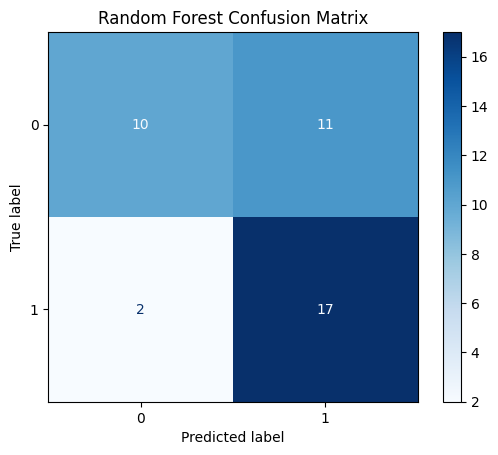

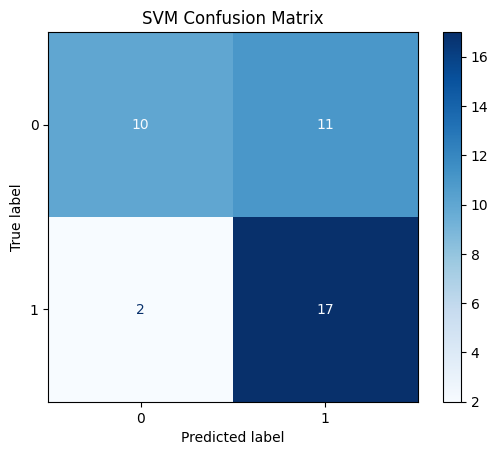

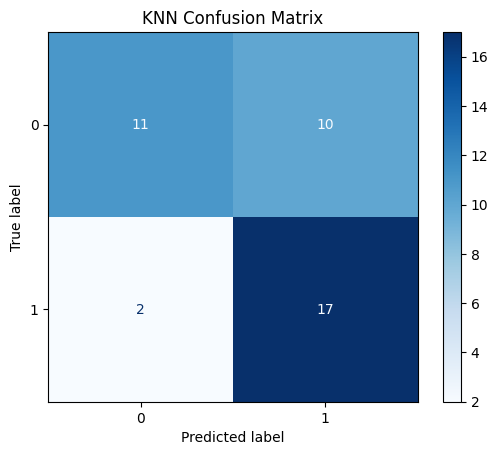

In [22]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")